# Linear Regression via Tensorflow
1- Create a data-set

Lets assume that relationship between the variable $Y$ and $X_1,...,X_5$ can be modelled as follows:

$Y=a_1.X_1+a_2.X_2+a_3.X_3+a_4.X_4+a_5.X_5+a_6$

We would like to determine the model parameters $a_1,...,a_6$ using TensorFlow.
In this example we will generate date by assuming the certain values for model parameters, randomly generating an input set, and then adding noise to the output. If executed successfully, our analysis should be able to estimate the original model parameters.

In [1]:
import tensorflow as tf
import numpy as np
N=3000  #number of data points
F=5     #number of features
X_Real=np.random.uniform(-100,100,[N,F]) #input features measured in real world
Weights_Real=np.random.uniform(-100,100,6)/10 #weights of the linear model describing the underlying real-world relationship between X and Y
Y_Real=np.dot(X_Real,Weights_Real[:F])+Weights_Real[F]+np.random.normal(0,3,size=N)
Y_Real=Y_Real.reshape(N,1)

Now we will build a TensorFlow linear model, in the form of a python function that takes input $X_1, ...X_5$ for n data points and produces output vector $Y$. The weights of the model are unknown at this point, and they will be defined as variables.

In [2]:
def Linear_Regression_Model(X):
    global Weights_Estimated
    Weights_Estimated=tf.Variable(np.random.normal(size=[6,1]),name="Estimated_Weights")
    Y=tf.add(tf.matmul(X,Weights_Estimated[:5,:]),Weights_Estimated[5,:])
    return Y

In [3]:
X=tf.placeholder(tf.float64,[None,F],name="Model_Input")
Y=tf.placeholder(tf.float64,[None,1],name="Train_Target_Values")
Y_Pred=Linear_Regression_Model(X)
Loss_Function=tf.reduce_mean(tf.square(tf.subtract(Y_Pred,Y_Real)))
Optimizer=tf.train.AdamOptimizer()
Task=Optimizer.minimize(Loss_Function)


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for _ in range(10000):
        session.run(Task,feed_dict={X:X_Real,Y:Y_Real})
    Weights=Weights_Estimated.eval().reshape(-1)

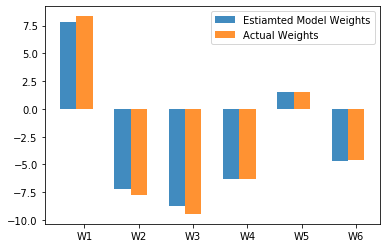

In [17]:
import matplotlib.pyplot as plt
X_Ticks=["W"+str(i+1) for i in range(F+1)]
X_ax_values=np.arange(F+1)
X_Label="Model Weights"
bar_width=0.3
plt.bar(x=X_ax_values,height=Weights,width=bar_width,tick_label=X_Ticks,label="Estiamted Model Weights",alpha=0.85)
plt.bar(x=X_ax_values+bar_width,height=Weights_Real,width=bar_width,tick_label=X_Ticks,label="Actual Weights",alpha=0.85)
plt.legend()
plt.show()